(455,)
(114,)
(114,)


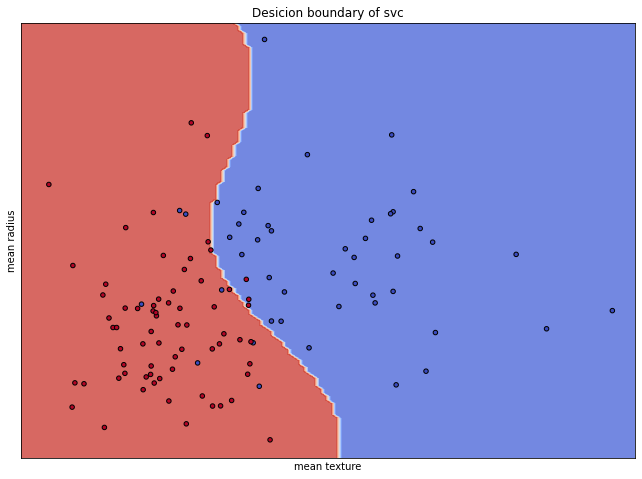

NameError: name 'y_predict' is not defined

In [33]:
import sklearn
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics

plt.rcParams['figure.figsize']=[11,8]
cancer = datasets.load_breast_cancer()
#Load the data set used for the example
A= cancer.data
b = cancer.target
feature_names = cancer.feature_names[:2]
#Split the data set into a train and test set
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split (A, b, test_size = 0.2)
#Choose the "labels" to clasify 
classes = ["Malignant" , "Benign"]


#Set the meshgrid
def do_grid(x,y, h= 0.2):
    #Plot the decision boundaries 
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    #Make a meshgrid
    xx, yy = np.meshgrid(np.arange(x_min , x_max , h),
                    np.arange(y_min , y_max , h))
    return xx, yy

def plot_contour(ax, clf, xx, yy, **params):
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    output = ax.contourf(xx, yy, z, **params)
    return output


#Select the Support Vector Classifier and train the model
model= svm.SVC()
clf = model.fit(x_train[:,:2],y_train)
#Predict the output of the trained model on 
#y_predict = clt.predict(x_test)
#Choose the variables to show
x0, x1 = x_test[:,0], x_test[:,1]
#print (x_test.shape)
#print (x1)
xx, yy = do_grid(x0,x1)

fig, ax = plt.subplots()
print(y_train.shape)
print(x0.shape)
print(x1.shape)

plot_contour(ax, clf, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.8)
ax.scatter(x0, x1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_ylabel("{}".format(feature_names[0]))
ax.set_xlabel("{}".format(feature_names[1]))
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Desicion boundary of svc')
plt.show()             

acc = metrics.accuracy_score(y_test, y_predict)





print (acc)

